In [ ]:
# The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. 
# Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series
# of login counts in ways that best characterize the underlying patterns of the demand. 
# Please report/illustrate important features of the demand, such as daily cycles. 
# If there are data quality issues, please report them.


# Conclusions


About 6% of the logins have the exact same time, which, depending on the scale of our app, could 
indicate duplicate data. More investigation would be needed to confirm that.

There are 9 average logins per 15 minute period. Logins counts are positively skewed and are highest each week 
on Fridays, Saturdays, and Sundays, and are highest each day between 10pm -1am and 11am - 12pm. There is some variation in daily logins depending on the day.

Between January 1970 and April 1970, daily logins have increased by 44% on Wednesday - Saturday, and by 16-32% on Sunday - Tuesday.

# Code and graphs


In [3]:
%matplotlib inline

import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
root = '/home/jovyan/work/Documents/ultimate_challenge'
os.listdir(root)

['ultimate_data_science_challenge.pdf',
 '.bash',
 'logins.json',
 'ultimate_data_challenge.json',
 'README.md',
 '.dockerignore',
 '.gitignore',
 '.ipynb_checkpoints',
 '.git',
 'logins_exploratory_data_analysis.ipynb',
 'conda_jupyter_notebook',
 '.idea']

In [5]:
logins = pd.read_json(root + '/logins.json')
logins = logins.sort_values(by='login_time')
logins['count'] = 1
print('num logins', len(logins))
print('first', logins.iloc[0]['login_time'])
print('last', logins.iloc[-1]['login_time'])

num logins 93142
first 1970-01-01 20:12:16
last 1970-04-13 18:57:38


In [6]:
def get_grouped_logins(logins, freq):
    logins_grouped = logins.groupby(pd.Grouper(key='login_time', freq=freq)).sum()
    logins_grouped['weekday'] = logins_grouped.index.dayofweek
    logins_grouped['is_weekend'] = logins_grouped['weekday'].apply(lambda dayofweek: dayofweek in [5, 6])
    return logins_grouped

logins_15min = get_grouped_logins(logins, '15min')
expected = pd.date_range(start=logins_15min.index[0], end=logins_15min.index[-1], freq='15min')
# Expected length
assert logins_15min.index.equals(expected)

In [7]:
# Check for duplicates / logins with the same time
print('number of logins with same time', len(logins[logins.duplicated()]))
print('% of logins with same time', len(logins) / len(logins[logins.duplicated()]) - 100)
logins[logins.duplicated()].groupby('login_time').sum().sort_values(by='count', ascending=False)

number of logins with same time 877
% of logins with same time 6.205245153933859


,count
login_time,
1970-01-09 01:31:25,2
1970-04-04 01:17:40,2
1970-02-12 11:16:53,2
1970-03-14 17:45:52,2
1970-01-06 21:45:52,2
...,...
1970-02-22 03:28:49,1
1970-02-22 03:29:14,1
1970-02-22 04:11:38,1


In [8]:
logins_15min['count'].describe()

count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
Name: count, dtype: float64

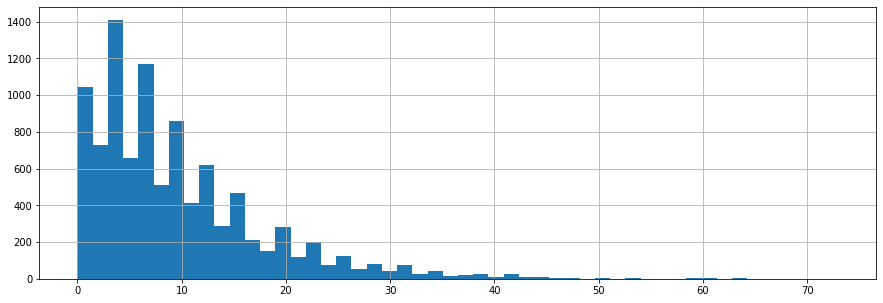

In [9]:
 logins_15min['count'].hist(figsize=(15, 5), bins=50)

In [109]:
logins_15min.sort_values(by='count', ascending=False).head(10)

,count,weekday,is_weekend
login_time,,,
1970-03-01 04:30:00,73,6,True
1970-04-04 05:30:00,66,5,True
1970-04-04 01:30:00,64,5,True
1970-04-04 01:15:00,63,5,True
1970-04-01 23:30:00,60,2,False
1970-04-04 05:00:00,60,5,True
1970-04-04 04:45:00,59,5,True
1970-04-04 05:15:00,59,5,True
1970-04-04 01:45:00,56,5,True


In [11]:
logins_day = get_grouped_logins(logins, 'D')
logins_week = get_grouped_logins(logins, 'W')

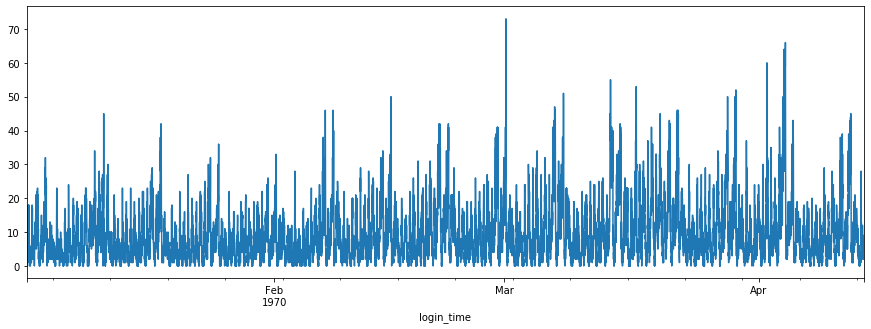

In [113]:
logins_15min['count'].plot(kind='line', figsize=(15, 5))

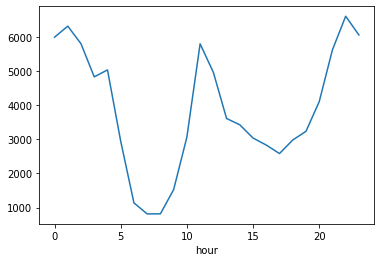

In [12]:
# There's a daily login cycle. Logins are highest each day between 10pm -1am and 11am - 12pm, and lowest between
# 6-7am and 5-6pm.
logins_hr = get_grouped_logins(logins, 'H')
logins_hr['hour'] = logins_hr.index.hour
logins_hr.groupby('hour')['count'].sum().plot()

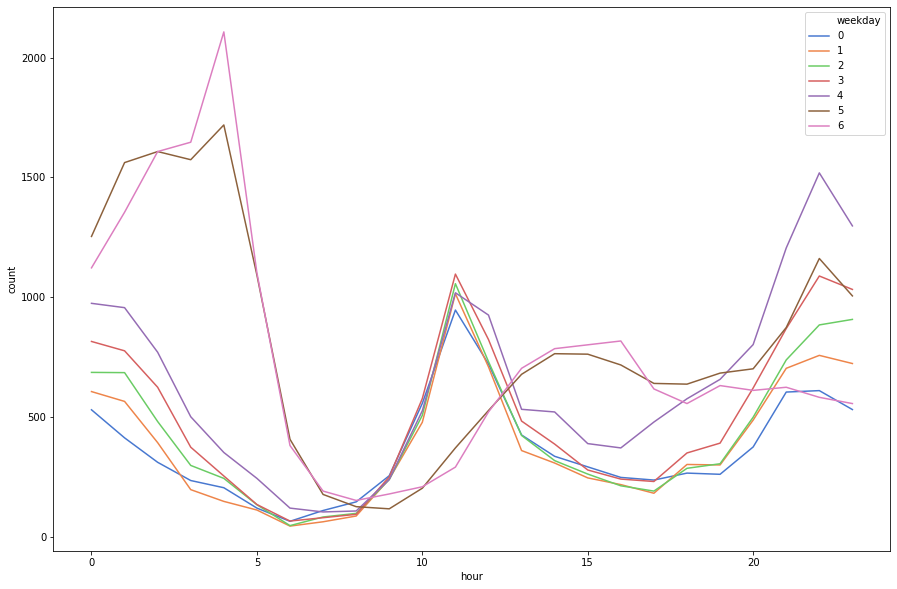

In [58]:
# There is some variation in daily logins by weekday. Saturday and Sunday have a slightly different pattern.
f, ax = plt.subplots(figsize=(15, 10))
grouped = logins_hr.groupby(['weekday', 'hour'])[['count']].sum()
grouped = grouped.reset_index(grouped.index.names)
sns.lineplot(x='hour', y='count', hue='weekday', palette=sns.color_palette("muted", n_colors=7), 
             data=grouped, ax=ax)

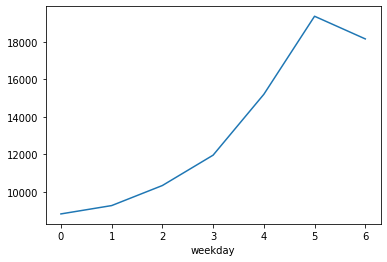

In [14]:
# There is also a weekly login cycle. Mondays and Tuesdays are the lowest logins, and Saturday - Sunday are the 
# highest.
logins_day.groupby('weekday').sum()['count'].plot()

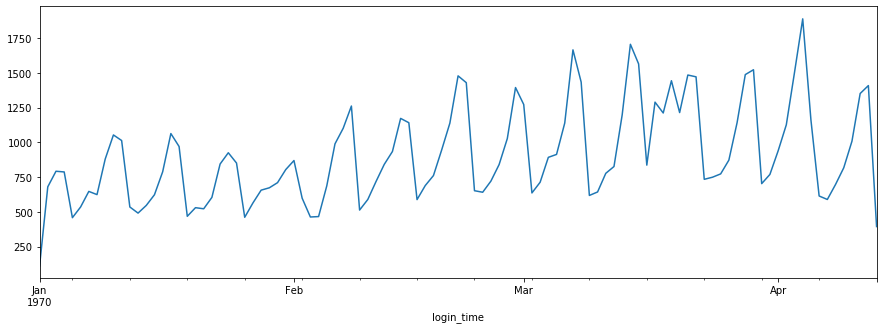

In [114]:
# The weekly login cycle is stable except for a period near the end of March. Perhaps this was a popular week due to 
# some event.
logins_day['count'].plot(kind='line', figsize=(15, 5))

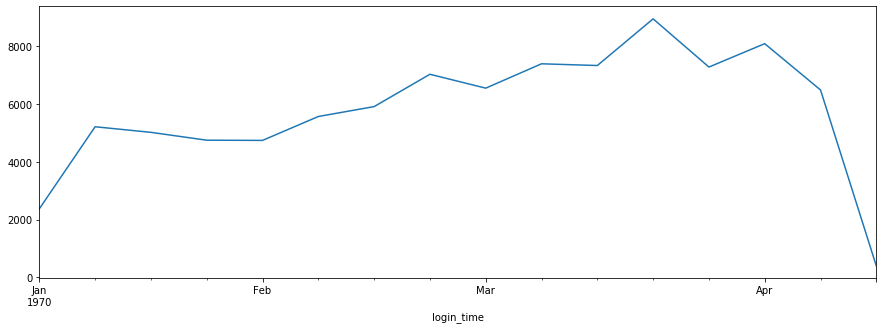

In [115]:
logins_week['count'].plot(kind='line', figsize=(15, 5))

In [124]:
# How have logins changed over time? 
# Compare the second to last and second most recent days to avoid comparing partial days.
(logins_day.groupby('weekday').nth(-2)['count'] - logins_day.groupby('weekday').nth(2)['count']) / logins_day.groupby('weekday').nth(-2)['count']

weekday
0    0.237398
1    0.310390
2    0.443024
3    0.446318
4    0.475399
5    0.436739
6    0.164372
Name: count, dtype: float64